In [95]:
import tensorflow as tf

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
# defining the path of dataset 
train_dir=r'D:\Fish_Detection\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
test_dir=r'D:\Fish_Detection\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test'
val_dir=r'D:\Fish_Detection\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val'

In [98]:
import cv2
import os

sample_class = os.listdir(train_dir)[0]
sample_image_path = os.path.join(train_dir, sample_class, os.listdir(os.path.join(train_dir, sample_class))[0])

img = cv2.imread(sample_image_path)
height, width, channels = img.shape
print(f"Image size: {width}x{height}, Channels: {channels}")

Image size: 256x256, Channels: 3


In [99]:
#defining standard image size and dimension
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [100]:
#rescaling and augumentation the training data
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=30,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [101]:
#rescaling the val and test data
val_test_datagen=ImageDataGenerator(rescale=1./255)

In [102]:

# Create Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [103]:
# Saving the class index as json file
import os
import json

class_names = sorted(os.listdir(train_dir))
class_names = [name for name in class_names if os.path.isdir(os.path.join(train_dir, name))]
labels = {i: name for i, name in enumerate(class_names)}

with open('class_labels.json', 'w') as f:
    json.dump(labels, f)

Model Training
CNN Model From Scratch

In [104]:
# Essential Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [105]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

d:\Fish_Detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.4421 - loss: 1.7539 - val_accuracy: 0.0925 - val_loss: 10.2697
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.6047 - loss: 1.1834 - val_accuracy: 0.2573 - val_loss: 6.4336
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.6721 - loss: 0.9821 - val_accuracy: 0.7225 - val_loss: 0.7889
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7282 - loss: 0.8041 - val_accuracy: 0.8663 - val_loss: 0.4387
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.7679 - loss: 0.7036 - val_accuracy: 0.9277 - val_loss: 0.2716
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.7897 - loss: 0.6441 - val_accuracy: 0.9167 - val_loss: 0.2966
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8130 - loss: 0.5615 - val_accuracy: 0.9368 - val_loss: 0.2386
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.8382 - loss: 0.4749 - val_acc

In [108]:
# Saving the model as h5
model.save('Custom CNN/custom_cnn_model.h5')

In [109]:
# Saving the model as keras
model.save('Custom CNN/custom_cnn_model.keras')

Model 1: VGG16

In [110]:
# Essential Imports
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [111]:
# Load pre-trained VGG16

VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [112]:
# Modifying the output layer

x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

In [113]:
# Set the whole model as trainable
VGG_base_model.trainable = True

# Freeze all layers except the last 4
for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [114]:
# Train the fine tuned VGG16 model

history_vgg_finetune = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.3267 - loss: 1.9482 - val_accuracy: 0.7070 - val_loss: 1.3318
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 547s 3s/step - accuracy: 0.6355 - loss: 1.1324 - val_accuracy: 0.8855 - val_loss: 0.6449
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 554s 3s/step - accuracy: 0.7855 - loss: 0.6970 - val_accuracy: 0.9451 - val_loss: 0.3450
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.8501 - loss: 0.4936 - val_accuracy: 0.9542 - val_loss: 0.2573
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.8892 - loss: 0.3759 - val_accuracy: 0.9615 - val_loss: 0.2027


In [115]:
# Saving the model as h5
model_vgg.save('VGG16/vgg_finetuned_model.h5')

In [116]:
# Saving the model as keras
model_vgg.save('VGG16/vgg_finetuned_model.keras')

Model 2: ResNet50

In [117]:
# Essentia Imports
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [118]:
# Load pre-trained ResNet50

resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [119]:
# Modifying the output layer

x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base_model.input, outputs=output)

In [120]:
# Set the whole model as trainable
resnet_base_model.trainable = True

# Freeze all layers except the last 20
for layer in resnet_base_model.layers[:-20]:
    layer.trainable = False

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [121]:

# Train the fine-tuned ResNet50 model

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2413 - loss: 2.1739 - val_accuracy: 0.0897 - val_loss: 2.4664
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.3941 - loss: 1.8198 - val_accuracy: 0.3700 - val_loss: 2.0671
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.4892 - loss: 1.5695 - val_accuracy: 0.5714 - val_loss: 1.3797
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.5362 - loss: 1.4013 - val_accuracy: 0.6712 - val_loss: 1.1154
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.5843 - loss: 1.2636 - val_accuracy: 0.6767 - val_loss: 1.0492
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.6204 - loss: 1.1661 - val_accuracy: 0.7372 - val_loss: 0.8859
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.6549 - loss: 1.0635 - val_accuracy: 0.7005 - val_loss: 0.9329
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.6802 - loss: 1.0011 - val_accu

In [122]:

# Saving the model as h5
model_resnet.save('ResNet50/resnet_finetuned_model.h5')

In [123]:

# Saving the model as keras
model_resnet.save('ResNet50/resnet_finetuned_model.keras')

Model 3: MobileNet

In [124]:
# Essentia Imports
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [125]:
# Load pre-trained MobileNet

mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [126]:
# Modifying the output layer

x = mobilenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=mobilenet_base_model.input, outputs=output)

In [127]:
# Set the whole model as trainable
mobilenet_base_model.trainable = True

# Freeze all layers except the last 30
for layer in mobilenet_base_model.layers[:-30]:
    layer.trainable = False

In [128]:

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [129]:
# Train the fine-tuned MobileNet model

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 741ms/step - accuracy: 0.2922 - loss: 2.2067 - val_accuracy: 0.6923 - val_loss: 1.2007
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.5897 - loss: 1.2415 - val_accuracy: 0.8782 - val_loss: 0.6596
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 177s 908ms/step - accuracy: 0.7463 - loss: 0.8087 - val_accuracy: 0.9396 - val_loss: 0.3946
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 730ms/step - accuracy: 0.8392 - loss: 0.5624 - val_accuracy: 0.9689 - val_loss: 0.2586
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 708ms/step - accuracy: 0.8848 - loss: 0.4299 - val_accuracy: 0.9808 - val_loss: 0.1799
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 7642s 39s/step - accuracy: 0.9197 - loss: 0.3220 - val_accuracy: 0.9844 - val_loss: 0.1356
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2016s 10s/step - accuracy: 0.9361 - loss: 0.2586 - val_accuracy: 0.9853 - val_loss: 0.1045
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9468 - loss: 0

In [130]:
# Saving the model as h5
model_mobilenet.save('MobileNet/mobilenet_finetuned_model.h5')

In [131]:

# Saving the model as keras
model_mobilenet.save('MobileNet/mobilenet_finetuned_model.keras')

Model 4: InceptionV3

In [132]:
# Essential Imports
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [133]:
# Load pre-trained InceptionV3

inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [134]:
# Modify the output layer

x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=inception_base_model.input, outputs=output)

In [135]:
# Set the whole model as trainable
inception_base_model.trainable = True

# Freeze all layers except the last 50
for layer in inception_base_model.layers[:-50]:
    layer.trainable = False

In [136]:
# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [137]:
# Train the fine-tuned InceptionV3

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.4618 - loss: 1.7182 - val_accuracy: 0.8361 - val_loss: 0.8812
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7904 - loss: 0.8310 - val_accuracy: 0.9249 - val_loss: 0.4119
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 152s 782ms/step - accuracy: 0.8742 - loss: 0.5160 - val_accuracy: 0.9560 - val_loss: 0.2521
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 761ms/step - accuracy: 0.9036 - loss: 0.3696 - val_accuracy: 0.9670 - val_loss: 0.1766
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9319 - loss: 0.2766 - val_accuracy: 0.9753 - val_loss: 0.1310
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 750ms/step - accuracy: 0.9418 - loss: 0.2230 - val_accuracy: 0.9826 - val_loss: 0.1013
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 148s 757ms/step - accuracy: 0.9578 - loss: 0.1767 - val_accuracy: 0.9853 - val_loss: 0.0811
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 147s 755ms/step - accuracy: 0.9622 - loss: 0.

In [138]:
# Saving the model as h5
model_inception.save('InceptionV3/inception_finetuned_model.h5')

In [139]:

# Saving the model as keras
model_inception.save('InceptionV3/inception_finetuned_model.keras')

Model 5: EfficientNetB0

In [140]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [141]:
# Load pre-trained EfficientNetB0

efficientnet_base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [142]:
# Modify output layer

x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=efficientnet_base_model.input, outputs=output)

In [143]:
# Set the whole model as trainable
efficientnet_base_model.trainable = True

# Freeze all layers except the top 20
for layer in efficientnet_base_model.layers[:-20]:
    layer.trainable = False

In [144]:
# Compile the model
model_efficientnet.compile(optimizer=Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [145]:
# Train the fine-tuned EfficientNetB0


history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 479ms/step - accuracy: 0.1118 - loss: 2.4337 - val_accuracy: 0.1712 - val_loss: 2.3582
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 473ms/step - accuracy: 0.1329 - loss: 2.3908 - val_accuracy: 0.1712 - val_loss: 2.3376
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 469ms/step - accuracy: 0.1566 - loss: 2.3664 - val_accuracy: 0.1712 - val_loss: 2.3279
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 467ms/step - accuracy: 0.1582 - loss: 2.3578 - val_accuracy: 0.1712 - val_loss: 2.3213
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 475ms/step - accuracy: 0.1594 - loss: 2.3486 - val_accuracy: 0.1712 - val_loss: 2.3174
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 469ms/step - accuracy: 0.1614 - loss: 2.3476 - val_accuracy: 0.1712 - val_loss: 2.3148
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.1576 - loss: 2.3434 - val_accuracy: 0.1712 - val_loss: 2.3123
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 469ms/step - accuracy: 0.1627 - loss: 

In [146]:
import os


# Save as h5
model_efficientnet.save('EfficientNetV2B0/efficientnet_finetuned_model.h5')

# Save as keras native format
model_efficientnet.save('EfficientNetV2B0/efficientnet_finetuned_model.keras')


Model Evaluation

In [147]:
# Computing CNNs Accuracy
cnn_loss, cnn_accuracy = model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

# Computing fine-tuned VGG16s Accuracy
vgg_loss, vgg_accuracy = model_vgg.evaluate(test_generator)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

# Computing fine-tuned ResNet50s Accuracy
resnet_loss, resnet_accuracy = model_resnet.evaluate(test_generator)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

# Computing fine-tuned MobileNets Accuracy
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

# Computing fine-tuned InceptionV3 Accuracy
inception_loss, inception_accuracy = model_inception.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

# Computing fine-tuned EfficientNetb0 Accuracy
efficient_loss, efficient_accuracy = model_efficientnet.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.9856 - loss: 0.1169
Custom CNN Accuracy: 0.9856
100/100 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9642 - loss: 0.1785
VGG16 Accuracy: 0.9642
100/100 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.7794 - loss: 0.6819
ResNet50 Accuracy: 0.7794
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - accuracy: 0.9950 - loss: 0.0347
MobileNet Accuracy: 0.9950
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.9956 - loss: 0.0263
InceptionV3 Accuracy: 0.9956
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.1632 - loss: 2.3103
EfficientNetB0 Accuracy: 0.1632


Precision, Recall, and F1-score

In [149]:
# Essential Imports
from sklearn.metrics import classification_report
import numpy as np

In [150]:
# Custom CNN
test_generator.reset()
cnn_prob = model.predict(test_generator, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("=== Custom CNN ===")
print(classification_report(test_generator.classes, cnn_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== Custom CNN ===
                                  precision    recall  f1-score   support

                     animal fish     0.9755    0.9942    0.9848       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9487    0.9933    0.9705       298
   fish sea_food gilt_head_bream     1.0000    0.9770    0.9884       305
   fish sea_food hourse_mackerel     0.9965    0.9825    0.9894       286
        fish sea_food red_mullet     0.9966    1.0000    0.9983       291
     fish sea_food red_sea_bream     0.9749    0.9963    0.9855       273
          fish sea_food sea_bass     0.9905    0.9602    0.9752       327
            fish sea_food shrimp     0.9966    1.0000    0.9983       289
fish sea_food striped_red_mullet     1.0000    0.9932    0.9966       293
             fish sea_food trout     0.9865    1.0000    0.9932       292

                        accuracy                         0.9856      3187
                 

In [151]:
# VGG16
test_generator.reset()
vgg_prob = model_vgg.predict(test_generator, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("=== VGG16 ===")
print(classification_report(test_generator.classes, vgg_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== VGG16 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9772    0.9885    0.9828       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9803    1.0000    0.9900       298
   fish sea_food gilt_head_bream     1.0000    0.9443    0.9713       305
   fish sea_food hourse_mackerel     0.9724    0.9860    0.9792       286
        fish sea_food red_mullet     0.9914    0.7938    0.8817       291
     fish sea_food red_sea_bream     0.9647    1.0000    0.9820       273
          fish sea_food sea_bass     0.9969    0.9847    0.9908       327
            fish sea_food shrimp     0.9965    0.9896    0.9931       289
fish sea_food striped_red_mullet     0.8151    0.9932    0.8954       293
             fish sea_food trout     0.9730    0.9863    0.9796       292

                        accuracy                         0.9642      3187
                      

In [152]:
# ResNet50
test_generator.reset()
resnet_prob = model_resnet.predict(test_generator, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("=== ResNet50 ===")
print(classification_report(test_generator.classes, resnet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== ResNet50 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9779    0.8519    0.9106       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.8098    0.8289    0.8192       298
   fish sea_food gilt_head_bream     0.7948    0.6984    0.7435       305
   fish sea_food hourse_mackerel     0.5795    0.8916    0.7025       286
        fish sea_food red_mullet     0.6761    0.8247    0.7430       291
     fish sea_food red_sea_bream     0.6718    0.9597    0.7903       273
          fish sea_food sea_bass     0.8167    0.6269    0.7093       327
            fish sea_food shrimp     0.9200    0.8754    0.8972       289
fish sea_food striped_red_mullet     0.8396    0.3038    0.4461       293
             fish sea_food trout     0.8052    0.9486    0.8711       292

                        accuracy                         0.7794      3187
                   

In [153]:
# MobileNet
test_generator.reset()
mobilenet_prob = model_mobilenet.predict(test_generator, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("=== MobileNet ===")
print(classification_report(test_generator.classes, mobilenet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== MobileNet ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    0.9981    0.9867       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     1.0000    0.9966    0.9983       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     0.9939    1.0000    0.9970       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9966    0.9966    0.9966       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9950      3187
                  

In [154]:
# InceptionV3
test_generator.reset()
inception_prob = model_inception.predict(test_generator, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_generator.classes, inception_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9793    1.0000    0.9895       520
                animal fish bass     1.0000    0.1538    0.2667        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9966    0.9931    0.9948       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9932    0.9966    0.9949       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9956      3187
                

In [155]:
# EfficientNetV2B0
test_generator.reset()
efficient_prob = model_efficientnet.predict(test_generator, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("=== EfficientNetV2B0 ===")
print(classification_report(test_generator.classes, efficient_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== EfficientNetV2B0 ===
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
           

Confusion Matrix

In [157]:
# Essential Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [158]:
# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

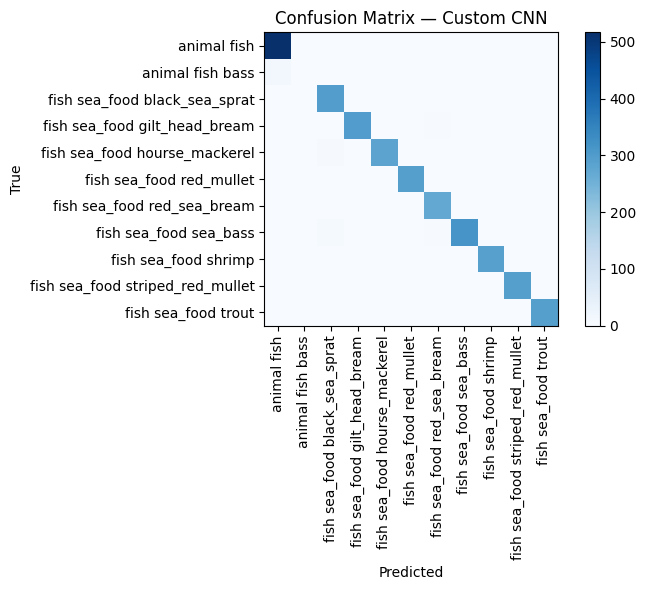

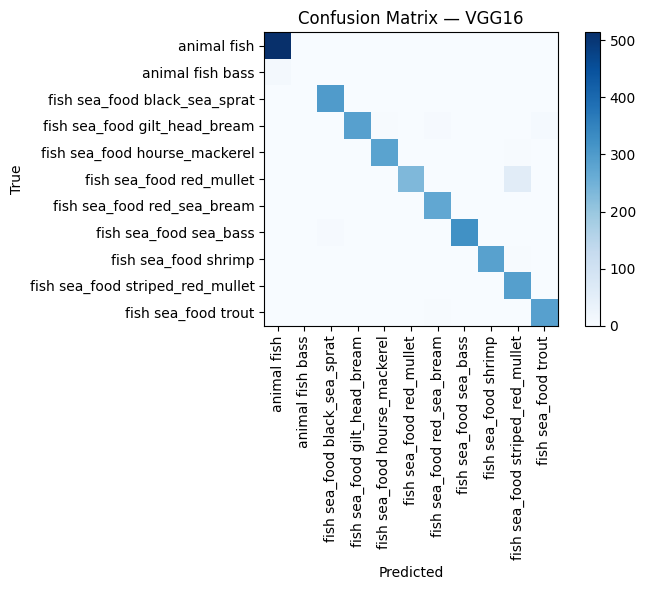

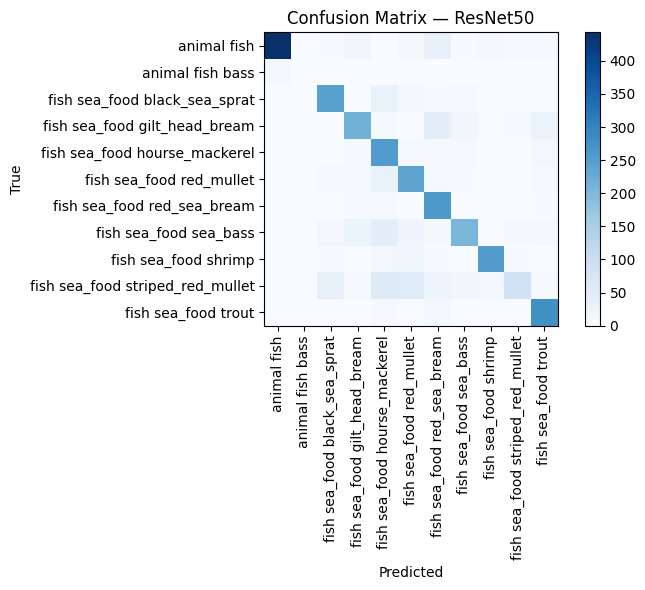

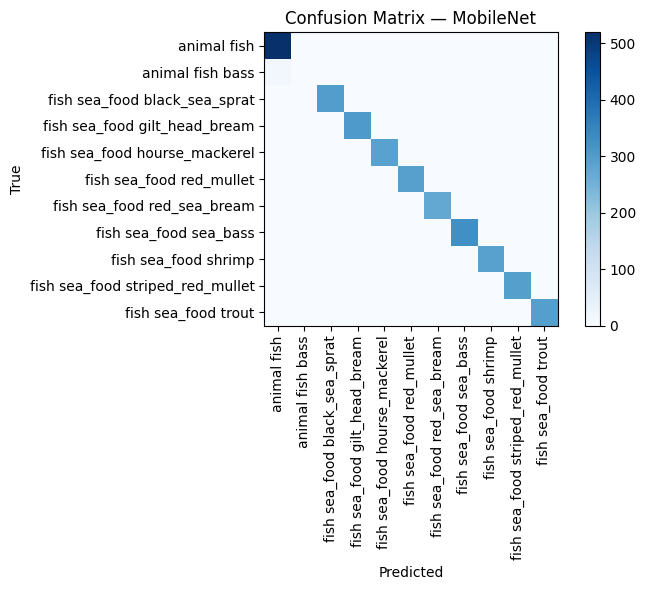

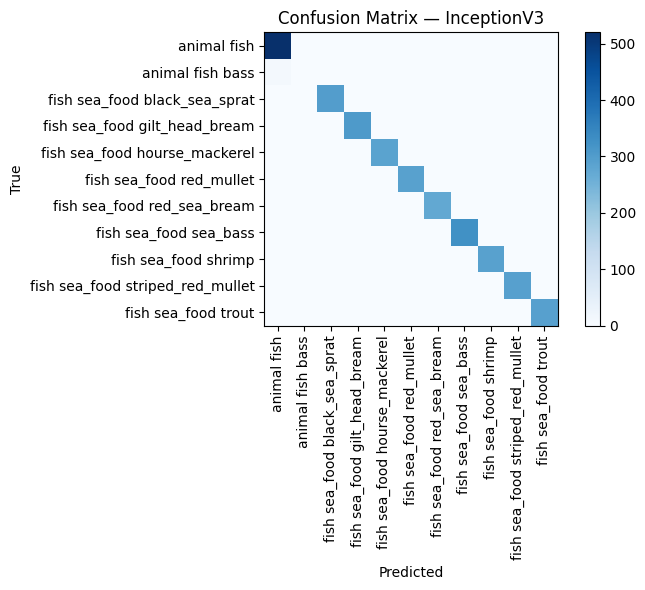

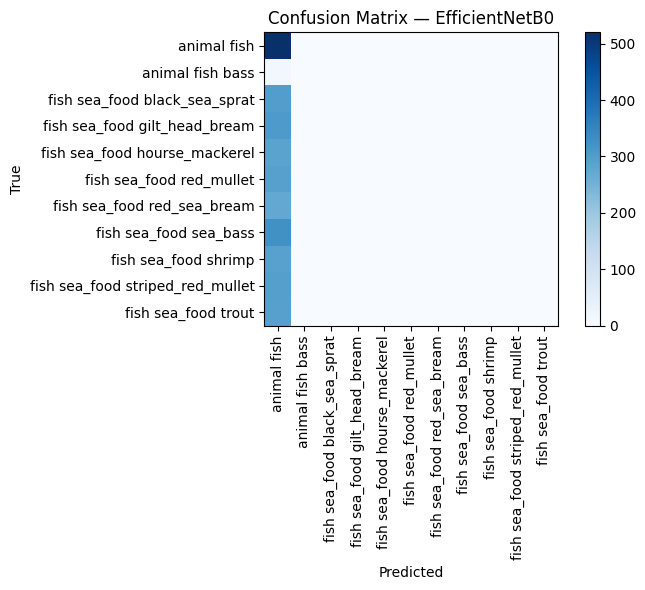

In [159]:
class_names = list(test_generator.class_indices.keys())
y_true = test_generator.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")

Visualize training history (accuracy and loss) for each model.

In [160]:
# Essential Imports
import matplotlib.pyplot as plt

In [161]:
histories = [
    ("Custom CNN",             history),                 # e.g., from model.fit(...)
    ("VGG16 (fine-tuned)",     history_vgg_finetune),
    ("ResNet50 (fine-tuned)",  history_resnet),
    ("MobileNet (fine-tuned)", history_mobilenet),
    ("InceptionV3 (fine-tuned)", history_inception),
    ("EfficientNetV2B0 (fine-tuned)", history_efficientnet),
]

def _get(hist, k1, k2):
    return hist.history.get(k1) or hist.history.get(k2)

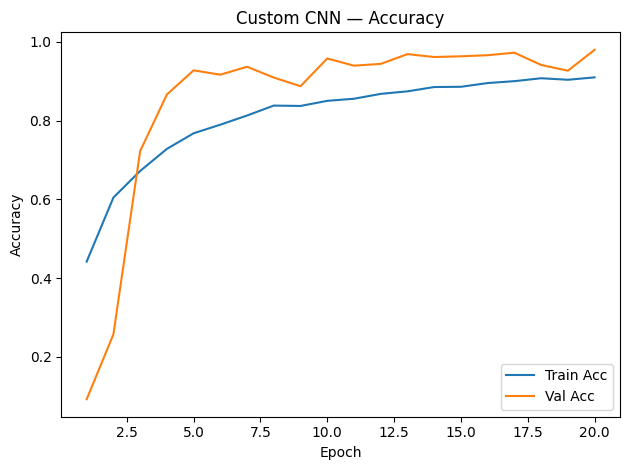

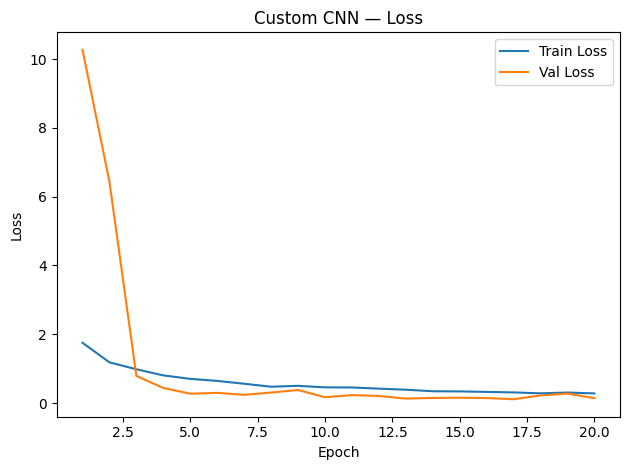

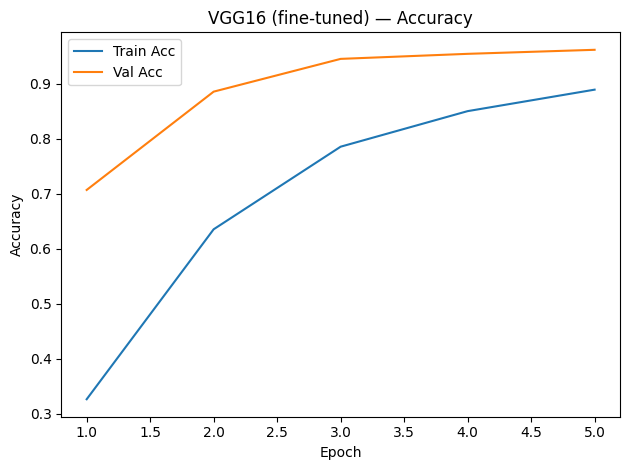

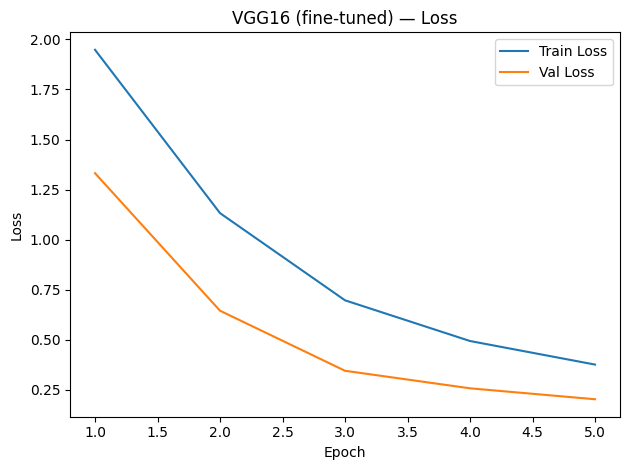

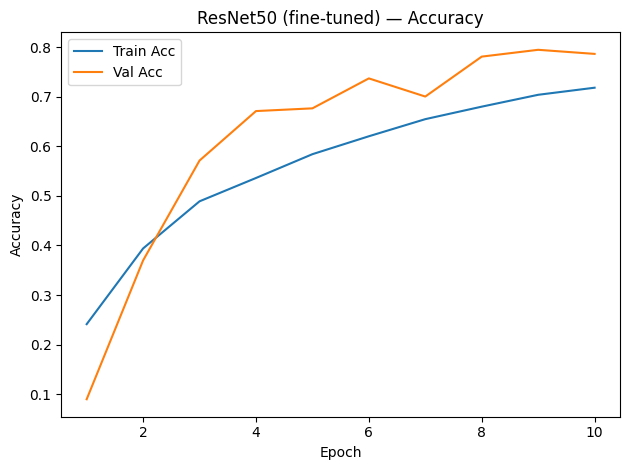

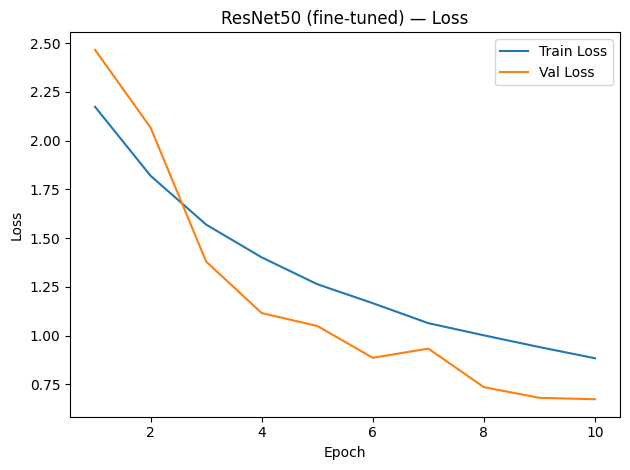

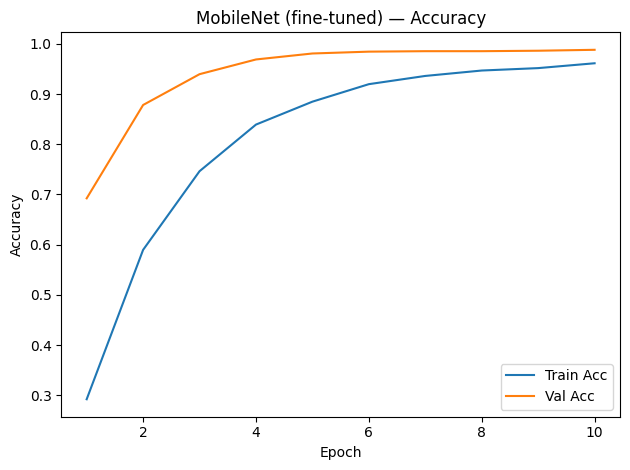

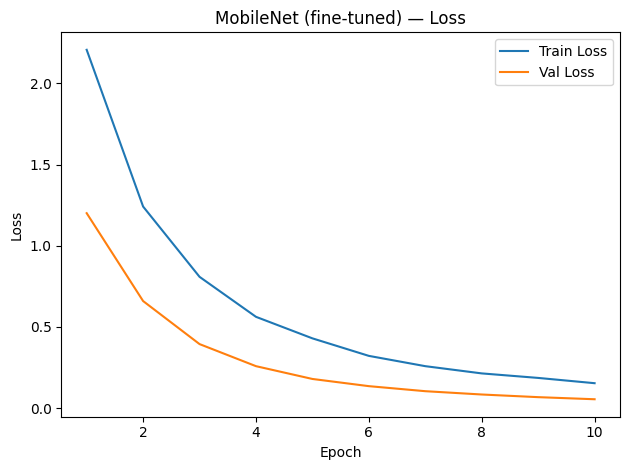

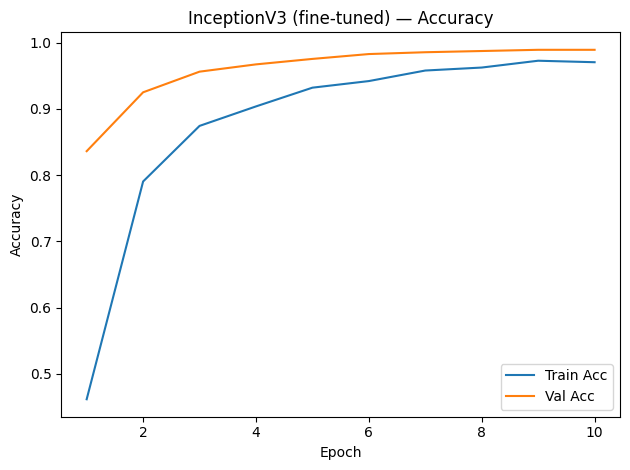

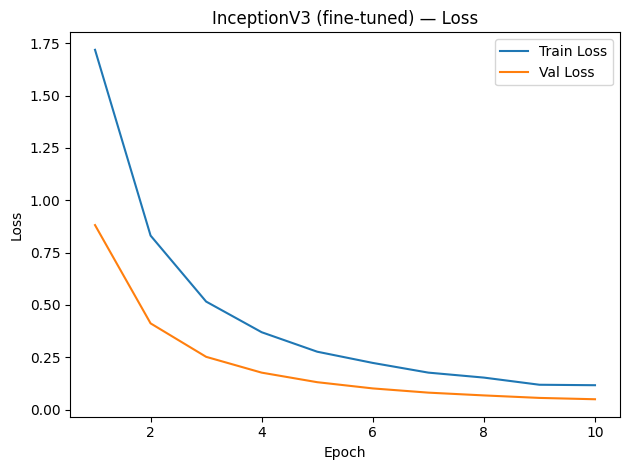

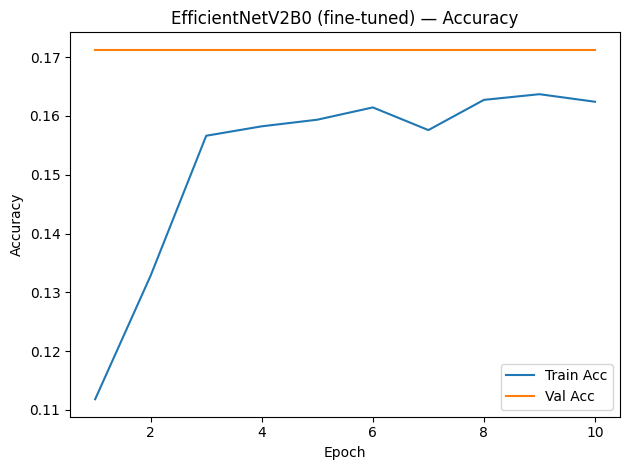

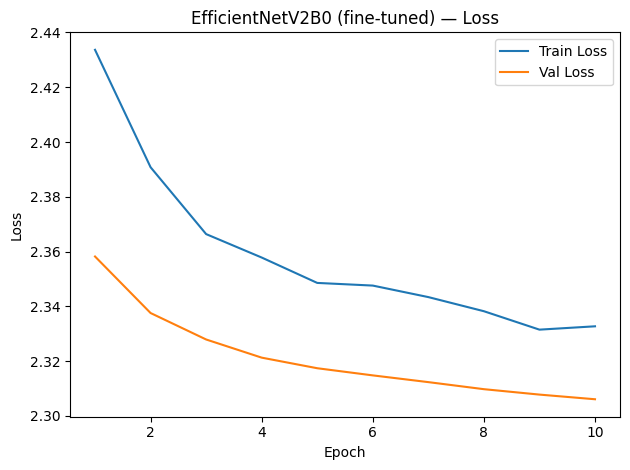

In [162]:
# Iterate through each model
for title, h in histories:
    acc     = _get(h, "accuracy", "acc")
    val_acc = _get(h, "val_accuracy", "val_acc")
    loss    = h.history.get("loss")
    val_loss= h.history.get("val_loss")
    epochs  = range(1, len(loss)+1) if loss else range(1, len(acc)+1)

    # Plot Accuracy
    plt.figure()
    if acc:     plt.plot(epochs, acc, label="Train Acc")
    if val_acc: plt.plot(epochs, val_acc, label="Val Acc")
    plt.title(f"{title} — Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Loss
    plt.figure()
    if loss:     plt.plot(epochs, loss, label="Train Loss")
    if val_loss: plt.plot(epochs, val_loss, label="Val Loss")
    plt.title(f"{title} — Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()